<a href="https://colab.research.google.com/github/angelh-16/claims-analysis/blob/main/notebooks/claims_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HHA507 Assignment 5: Healthcare Claims Data Analysis**

## Part 1: Data Loading and Exploration

In [153]:
# 1.1 Load the three CSV files into pandas DataFrames

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_header = pd.read_csv('data/STONYBRK_20240531_HEADER.csv')
df_line   = pd.read_csv('data/STONYBRK_20240531_LINE.csv')
df_code   = pd.read_csv('data/STONYBRK_20240531_CODE.csv')

In [154]:
# 1.2 Explore each file by displaying: Shape (number of rows and columns), First 5 rows, Column names and data types, Missing value counts, Basic descriptive statistics for numeric columns

print('\n-----------Header-----------')
print('Shape:', df_header.shape)
print('\nFirst 5 Rows', df_header.head(5))
print('Column names and data types:', df_header.dtypes)
print('\nMissing value counts:', df_header.isna().sum())
print('Basic descriptive statistics for numeric columns:', df_header.select_dtypes(include=['int64', 'float64']).describe())

print('\n-----------Line-----------')
print('Shape:', df_line.shape)
print('\nFirst 5 Rows:', df_line.head(5))
print('Column names and data types:', df_line.dtypes)
print('\nMissing value counts:', df_line.isna().sum())
print('Basic descriptive statistics for numeric columns:', df_line.select_dtypes(include=['int64', 'float64']).describe())

print('\n-----------Code-----------')
print('shapes of df_header:', df_code.shape)
print('First 5 Rows', df_code.head(5))
print('Column names and data types:', df_code.dtypes)
print('\nMissing value counts:', df_code.isna().sum())
print('Basic descriptive statistics for numeric columns', df_code.select_dtypes(include=['int64', 'float64']).describe())


-----------Header-----------
Shape: (388, 43)

First 5 Rows    ClientId  ProspectiveClaimId ClaimType  BillingProviderNPI  \
0        49            35216986         P          1154376309   
1        49            35235657         P          1154376309   
2        49            35249003         P          1154376309   
3        49            35249014         P          1154376309   
4        49            35249016         P          1154376309   

               BillingProvFirstName  BillingProvLastName  \
0  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
1  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
2  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
3  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
4  NEW YORK SPINE AND BRAIN SURGERY                  NaN   

   AttendingProviderNPI AttendingProvFirstName AttendingProvLastName  \
0                   NaN                    NaN                   NaN   
1                   NaN                    

In [165]:
# 1.3 Document your observations about:

## How many unique claims are in the dataset?
h_unique_claim = df_header['ProspectiveClaimId'].nunique()
print('HEADER: There is ', h_unique_claim, 'unique claims.')

l_unique_claim = df_line['ProspectiveClaimId'].nunique()
print('LINE: There is ', l_unique_claim, 'unique claims')

c_unique_claim = df_code['ProspectiveClaimId'].nunique()
print('CODE: There is ', c_unique_claim, 'unique claims.')

## What is the date range of the claims?
df_header['ServiceFromDate'] = pd.to_datetime(df_header['ServiceFromDate'], errors='coerce')
df_header['ServiceToDate']   = pd.to_datetime(df_header['ServiceToDate'], errors='coerce')

print('ServiceFromDate range:', df_header['ServiceFromDate'].min(), 'to', df_header['ServiceFromDate'].max())

## How many service lines are there on average per claim?
serv_per_claim = df_line.groupby('ProspectiveClaimId')['LinePos'].count()
print('Average service lines per claim:', serv_per_claim.mean())

## How many diagnosis codes are there on average per claim?
diag_per_claim = df_code.groupby('ProspectiveClaimId')['CodePos'].count()
print('Average diagnosis codes per claim:', diag_per_claim.mean())

HEADER: There is  388 unique claims.
LINE: There is  388 unique claims
CODE: There is  388 unique claims.
ServiceFromDate range: 2023-09-25 00:00:00 to 2024-05-29 00:00:00
Average service lines per claim: 1.3402061855670102
Average diagnosis codes per claim: 3.9587628865979383


There is 388 unique claims in the dataset submitted between September 25, 2023 to May 29, 2024, which is about 8 months of billing activity. The average of service lines per claim is about 1.34, which means most claims only contain one service line, but a portion have two or more.The average of diagnosis codes per claim is about 3.96. This means each claim has around 3 diagnosis codes on average. Even though the number of service lines is low, the number of diagnosis codes suggests that the patients being treated may have multiple conditions or complications documented.

## Part 2: Relational Data Analysis

**Question 1:** ***Who are the top 5 billing providers by number of claims?*** \
The top 5 billing providers by number of claims is:
1. SB INTERNISTS with 152 claims
2. SB SURGICAL ASSOCIATES with 81 claims
3. NEW YORK SPINE AND BRAIN SURGERY with 69 claims
4. UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY with 40 claims
5. SB PSYCHIATRIC ASSOCIATES with 36 claims\
The provider with the most number of claims is nearly double of that following. This likely means the provider is seeing more patients or have more patient encounters or more regular follow-up visits.

BillingProviderNPI  BillingProvFirstName               
1821035601          SB INTERNISTS                          152
1063468536          SB SURGICAL ASSOCIATES                  81
1154376309          NEW YORK SPINE AND BRAIN SURGERY        69
1538114723          UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY     40
1437105905          SB PSYCHIATRIC ASSOCIATES               36
Name: ProspectiveClaimId, dtype: int64


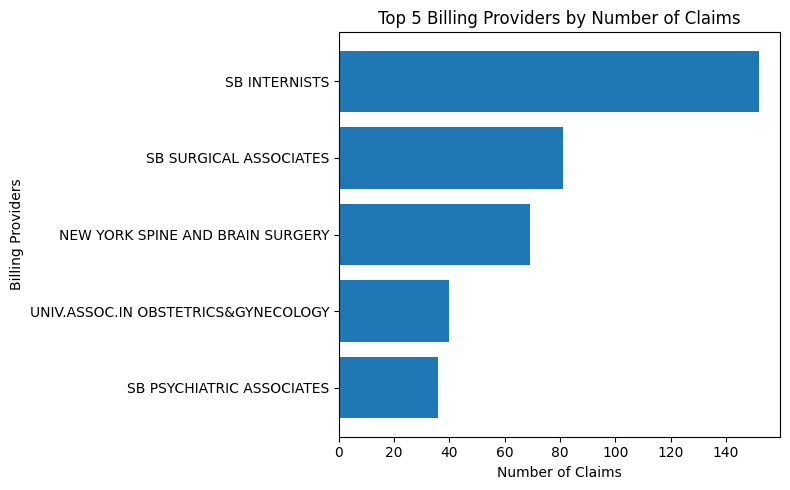

In [156]:
# Question 1: Provider Analysis

# Who are the top 5 billing providers by number of claims?
# Display: Provider name, NPI, and claim count

top5_pc = df_header.groupby(['BillingProviderNPI', 'BillingProvFirstName'])['ProspectiveClaimId'].count().nlargest(5)
print(top5_pc)

# Create a simple bar chart showing the top 5 providers
top5_pc_df = top5_pc.reset_index()

top5_pc_df['Provider'] = (
    top5_pc_df['BillingProvFirstName'].astype(str)
)

plt.figure(figsize = (8, 5))
plt.barh(top5_pc_df['Provider'], top5_pc_df['ProspectiveClaimId'])
plt.title('Top 5 Billing Providers by Number of Claims')
plt.xlabel('Number of Claims')
plt.ylabel('Billing Providers')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

**Question 2:** ***What are the top 5 primary payers by claim volume?***
1. MEDICARE with 242 claims
2. HEALTHFIRST FFS with 46 claims
3. FIDELIS/BETTER HEALTH PLAN with 26 claims
4. HIP MEDICAID with 17 claims
5. HEALTHFIRST CAPITATED with 10 claims \
This shows Medicare hhas the insurance payer that has the most share of claim activity, indicating that more patients use them and are covered by them for their visits and treatments.

PrimaryPayerName
MEDICARE                      242
HEALTHFIRST FFS                46
FIDELIS/BETTER HEALTH PLAN     26
HIP MEDICAID                   17
HEALTHFIRST CAPITATED          10
Name: count, dtype: int64

PrimaryPayerName
AETNA                                      1.546392
AETNA MEDICARE                             0.515464
BLUES EXCHANGE                             0.257732
CIGNA HMO                                  0.515464
DIRECT SELF PAY                            1.546392
EMPIRE BLUE HMO                            0.257732
EMPIRE BLUE PPO                            0.515464
EMPIRE BLUE SR                             1.030928
FIDELIS CAPITATED                          1.288660
FIDELIS/BETTER HEALTH PLAN                 6.701031
HEALTHFIRST CAPITATED                      2.577320
HEALTHFIRST ESSENTIAL                      0.257732
HEALTHFIRST FFS                           11.855670
HEALTHFIRST INCREASED BENEFIT PLAN HMO     0.257732
HIP MEDICAID                             

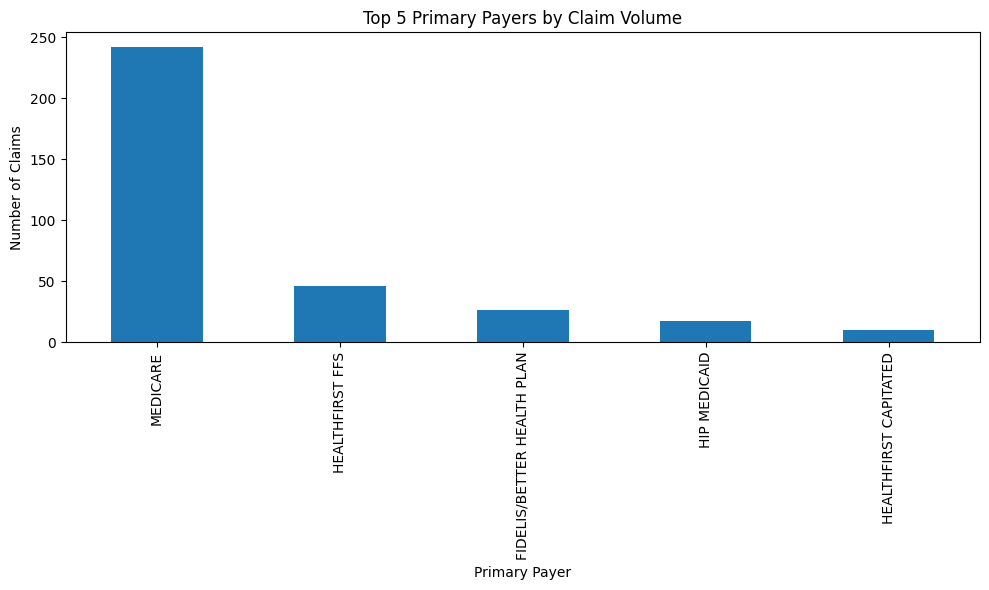

In [157]:
#Question 2: Payer Mix Analysis

# What are the top 5 primary payers by claim volume?
top5_payers = df_header['PrimaryPayerName'].value_counts().nlargest(5)
print(top5_payers)
print()

# Calculate the percentage of total claims for each payer
payers = df_header.groupby('PrimaryPayerName')['ProspectiveClaimId'].count()
payers_dis = (payers/payers.sum())*100
print(payers_dis)

# Create a bar chart or pie chart showing payer distribution
plt.figure(figsize = (10,6))
top5_payers.plot(kind='bar')

plt.title('Top 5 Primary Payers by Claim Volume')
plt.xlabel('Primary Payer')
plt.ylabel('Number of Claims')
plt.tight_layout()
plt.show()

**Question 3:** ***What are the 10 most frequently appearing diagnosis codes (CodeValue)?***
1. J96.01 (62 times)
2. I10 (49 times)
3. E78.5 (49 times)
4. G93.5 (34 times)
5. D64.9 (29 times)
6. I25.10 (27 times)
7. I61.9 (26 times)
8. I48.91 (24 times)
9. I60.8 (24 times)
10. I50.9 (22 times) \
This shows the diagnosis code of J96.01 as the one that appears most frequently among the claims. This also means that this is most common medical condition in this dataset.

In [158]:
# Question 3: Common Diagnoses

# What are the 10 most frequently appearing diagnosis codes (CodeValue)?
# Display: ICD-10 code and frequency count
# Note: You may want to look up what these codes mean online (icd10data.com)
top10_diag = df_code['CodeValue'].value_counts().nlargest(10)
print(top10_diag)
print()



CodeValue
J96.01    62
I10       49
E78.5     49
G93.5     34
D64.9     29
I25.10    27
I61.9     26
I48.91    24
I60.8     24
I50.9     22
Name: count, dtype: int64



**Question 4:** ***What are the 10 most frequently billed procedure codes (HCPCS)?***
1. CRITICAL CARE, INITIAL FIRST HOUR(68 times)
2. INITIAL HOSPITAL CARE PER DAY FOR THE E&M OF A PATIENT;LEVEL 2 (30  times)
3. SUBSEQ. HOSP CARE DETAILED INTERVAL HX,EX,HIGH COMPLEXITY DECISION (27 times)
4. INITIAL  HOSPITAL CARE PER DAY,FOR THE E&M OF A PATIENT;LEVEL 3 (24  times)
5. OFFICE/OUTPATIENT VISIT,ESTABL.PT,EXPANDED HX,EXAM,LOW COMPLEXITY DECISION (19 times)
6. FOR THE E&M OF A PATIENT;LEVEL 3 (18 times)
7. PSYCHOTHERAPY WITH AN E&M SERVICE,30 MINS,PATIENT AND/OR FAMILY (16 times)
8. OFFICE/OUTPATIENT VISIT FOR  E&M OF ESTAB PATIENT;LEVEL 3 (15 times)
9. COMPREHENSIVE AUDIOMETRY THRESHOLD EVALUATION; SPEECH RECOGNITION (14 times)
10. TELEPHONE SERVICES MD/NPP;11-20 MINUTES...... (13 times) \
These show which type of medical services are most commonly billed by providers and show the intensity and type of care delieved. Critical care appeared the most with 68 times, showing a large number of patients were serious and complex medical cases.

HCPCS  ClientProcedureName                                                       
99291  CRITICAL CARE, INITIAL FIRST HOUR                                             68
99222   INITIAL HOSPITAL CARE PER DAY FOR THE E&M OF A PATIENT;LEVEL 2               30
99233  SUBSEQ. HOSP CARE DETAILED INTERVAL HX,EX,HIGH COMPLEXITY DECISION            27
99223  INITIAL  HOSPITAL CARE PER DAY,FOR THE E&M OF A PATIENT;LEVEL 3               24
99213  OFFICE/OUTPATIENT VISIT,ESTABL.PT,EXPANDED HX,EXAM,LOW COMPLEXITY DECISION    19
99233  SUBSEQUENT HOSP. CARE,PER DAY,FOR THE E&M OF A PATIENT;LEVEL 3                18
90833  PSYCHOTHERAPY WITH AN E&M SERVICE,30 MINS,PATIENT AND/OR FAMILY               16
99213  OFFICE/OUTPATIENT VISIT FOR  E&M OF ESTAB PATIENT;LEVEL 3                     15
92557  COMPREHENSIVE AUDIOMETRY THRESHOLD EVALUATION; SPEECH RECOGNITION             14
99442  TELEPHONE SERVICES MD/NPP;11-20 MINUTES......                                 13
Name: count, dtype: int64



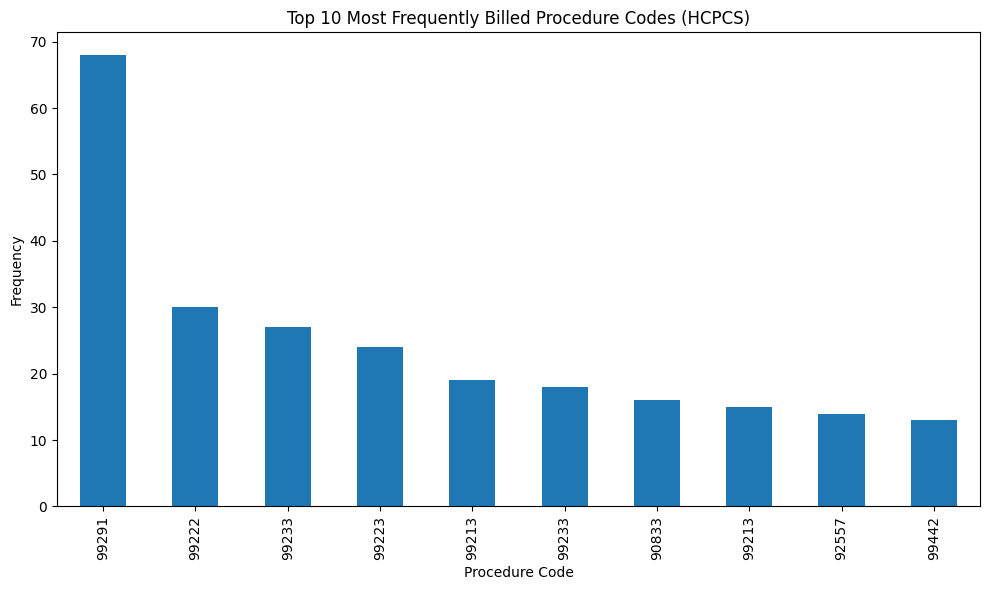

In [159]:
# Question 4: Common Procedures

# What are the 10 most frequently billed procedure codes (HCPCS)?
# Display: HCPCS code, description (if available in data), and frequency
top10_proced = df_line[['HCPCS','ClientProcedureName']].value_counts().nlargest(10)
print(top10_proced)
print()

# Create a bar chart showing the top 10 procedures
top10_proced.index = top10_proced.index.get_level_values('HCPCS')

top10_proced_df = top10_proced.reset_index()
top10_proced_df = top10_proced_df.set_index('HCPCS')

plt.figure(figsize = (10,6))
top10_proced.plot(kind='bar')
plt.title('Top 10 Most Frequently Billed Procedure Codes (HCPCS)')
plt.xlabel('Procedure Code')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Question 5:** ***How many claims were submitted for each PlaceOfService?***
* Inpatient Hospital: 231 claims

* Doctor’s Office: 132 claims

* Outpatient Hospital: 14 claims

* Ambulatory Surgery Center: 10 claims

* Emergency Room: 1 claim
***Percentage:***
* Inpatient: 59.54%

* Doctor’s Office: 34.02%

* All other settings combined: 6.44% \
The high inpatient volume of 59.54%  shows that the providers primarily care for higher-acuity patient requiring hospitalization.

In [160]:
# Question 5: Service Location Analysis

# How many claims were submitted for each PlaceOfService?
claims_per_place = df_header[['PlaceOfService', 'Facility_Location']].value_counts()
print(claims_per_place)
print()

# What percentage of claims are for "INPATIENT" vs "DOCTOR'S OFFICE"?
inpatient_claims = df_header[df_header['Facility_Location'] == 'INPATIENT']['ProspectiveClaimId'].count()
doc_claims = df_header[df_header['Facility_Location'] == 'DOCTOR\'S OFFICE']['ProspectiveClaimId'].count()


total_claims = df_header['ProspectiveClaimId'].nunique()

inpatient_percentage = (inpatient_claims / total_claims) * 100
doc_percentage = (doc_claims / total_claims) * 100

print(f"Inpatient claims percentage: {inpatient_percentage:.2f}%")
print(f"Doctor's office claims percentage: {doc_percentage:.2f}%")


PlaceOfService  Facility_Location  
21              INPATIENT              231
11              DOCTOR'S OFFICE        132
22              OUTPATIENT HOSPITAL     14
                AMBULATORY SURGERY      10
23              EMERGENCY                1
Name: count, dtype: int64

Inpatient claims percentage: 59.54%
Doctor's office claims percentage: 34.02%


## Part 3: Advanced Analysis with Joins

**Question 6:** ***Identify claims with 5 or more service lines*** \
SB CHILDREN'S SERVICE has the most number of service lines per claim of 7, followed by 4 UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY. It also only showed up 5 claims that have 5 or more service lines which indicate patients who required multiple services in a single visit.

In [161]:
# Question 6: Claims with High Service Line Counts

# Merge the HEADER and LINE files
merge_hl = pd.merge(df_header, df_line, on='ProspectiveClaimId', how = 'inner')

# Calculate the total number of service lines per claim
lines_count = merge_hl.groupby('ProspectiveClaimId')['LinePos'].count()
print(lines_count)
print()

# Identify claims with 5 or more service lines
# Display: ClaimId, Provider name, number of lines, and total charges
more5_lines = merge_hl.groupby('ProspectiveClaimId').filter(lambda x: x['LinePos'].count() >= 5)
more5_chart = more5_lines.groupby('ProspectiveClaimId').agg(
    Provider=('BillingProvFirstName', 'first'),
    LineCount=('LinePos', 'count'),
    TotalCharges=('Charges', 'sum')
).reset_index()

more5_chart = more5_chart.sort_values(by='LineCount', ascending=False)

print(f'Claims with 5 or more service lines:\n{more5_chart.to_string(index=False)}')

ProspectiveClaimId
35216986    1
35235657    1
35244774    1
35249003    1
35249014    1
           ..
36999799    3
37001070    4
37001295    3
37001309    3
37001489    2
Name: LinePos, Length: 388, dtype: int64

Claims with 5 or more service lines:
 ProspectiveClaimId                            Provider  LineCount  TotalCharges
           36794825               SB CHILDREN'S SERVICE          7          1163
           36668119 UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY          6          1030
           36740402 UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY          6           945
           36710175 UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY          5           873
           36757684 UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY          5           873


**Question 7:** ***Find the most common diagnosis code (CodeValue) associated with CPT code 99291***\
The most common diagnosis code associated with CPT code 99291 is J96.01 with 53 times which means the most common patient coming in is diagnosed with this.


In [162]:
# Question 7: Diagnosis-Procedure Combinations

# Create a merged dataset linking claims to both procedures and diagnoses
merge_lc = pd.merge(df_line, df_code, on='ProspectiveClaimId', how='inner')
merge_hlc = pd.merge(merge_lc, df_header, on='ProspectiveClaimId', how='inner')

# Find the most common diagnosis code (CodeValue) associated with CPT code 99291
# Hint: You'll need to merge all three files together
mostcommon_diag = merge_hlc[merge_hlc['HCPCS'] == '99291'].groupby(['CodeValue','HCPCS']).size().nlargest(10)
print(mostcommon_diag)
print()

top_diag = mostcommon_diag.nlargest(1)
print(f'Most Common Diagnosis code:\n {top_diag}')


CodeValue  HCPCS
J96.01     99291    53
G93.5      99291    34
E78.5      99291    33
I61.9      99291    26
D64.9      99291    25
I10        99291    24
I60.8      99291    24
I95.9      99291    20
D72.829    99291    19
I67.848    99291    17
dtype: int64

Most Common Diagnosis code:
 CodeValue  HCPCS
J96.01     99291    53
dtype: int64


**Question 8:** ***Calculate total charges (sum of all line charges) per claim*** \
Medicare has the highest total charges with 131,008 dollars since it also has the most number of claims of 242. It's average charge per claim is about $541.36 which is lower than some smaller payers.

In [163]:
# Question 8: Charges by Payer

# Merge HEADER and LINE files
merge_hl = pd.merge(df_header, df_line, on='ProspectiveClaimId', how='inner')

# Calculate total charges (sum of all line charges) per claim
charges_per_claim = merge_hl.groupby('ProspectiveClaimId')['Charges'].sum().reset_index()
charges_per_claim.rename(columns={'Charges':'TotalCharges'}, inplace=True)
print(charges_per_claim)
print()

merge_charges = pd.merge(charges_per_claim,
                         df_header[['ProspectiveClaimId','PrimaryPayerName']],
                         on='ProspectiveClaimId', how='left')

# Group by PrimaryPayerName and calculate:
# Total charges, Average charges per claim, Number of claims
summary = merge_charges.groupby('PrimaryPayerName').agg(
    TotalCharges=('TotalCharges','sum'),
    AverageCharges=('TotalCharges','mean'),
    NumberOfClaims=('ProspectiveClaimId','count')
).reset_index()

#Sort by total charges descending and display top 10 payers
top10 = summary.sort_values(by='TotalCharges', ascending=False).head(10)
print("Top 10 payers by total charges:")
print(top10.to_string(index=False))

     ProspectiveClaimId  TotalCharges
0              35216986          1155
1              35235657          1155
2              35244774          1155
3              35249003          1155
4              35249014          1155
..                  ...           ...
383            36999799           855
384            37001070          1150
385            37001295           211
386            37001309           210
387            37001489           105

[388 rows x 2 columns]

Top 10 payers by total charges:
                  PrimaryPayerName  TotalCharges  AverageCharges  NumberOfClaims
                          MEDICARE        131008      541.355372             242
                   HEALTHFIRST FFS         29794      647.695652              46
        FIDELIS/BETTER HEALTH PLAN         10810      415.769231              26
                      HIP MEDICAID         10014      589.058824              17
                             AETNA          6930     1155.000000               6
 

## Part 4: Creative Analysis


**Question 9:**
***Which providers bill for the most complex cases (highest number of diagnosis codes)?*** \
This analysis shows that NEW YORK SPINE AND BRAIN SURGERY handles the most complex cases with an average of about 9 diagnosis codes per claim.

 BillingProviderNPI                BillingProvFirstName  AverageDiagnosisCodes  NumberOfClaims
         1154376309    NEW YORK SPINE AND BRAIN SURGERY               9.231884              69
         1982659470   SB FAMILY AND PREVENTIVE MEDICINE               7.000000               1
         1821035601                       SB INTERNISTS               3.592105             152
         1083660575               SB CHILDREN'S SERVICE               3.333333               9
         1538114723 UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY               2.125000              40
         1063468536              SB SURGICAL ASSOCIATES               2.049383              81
         1437105905           SB PSYCHIATRIC ASSOCIATES               1.805556              36


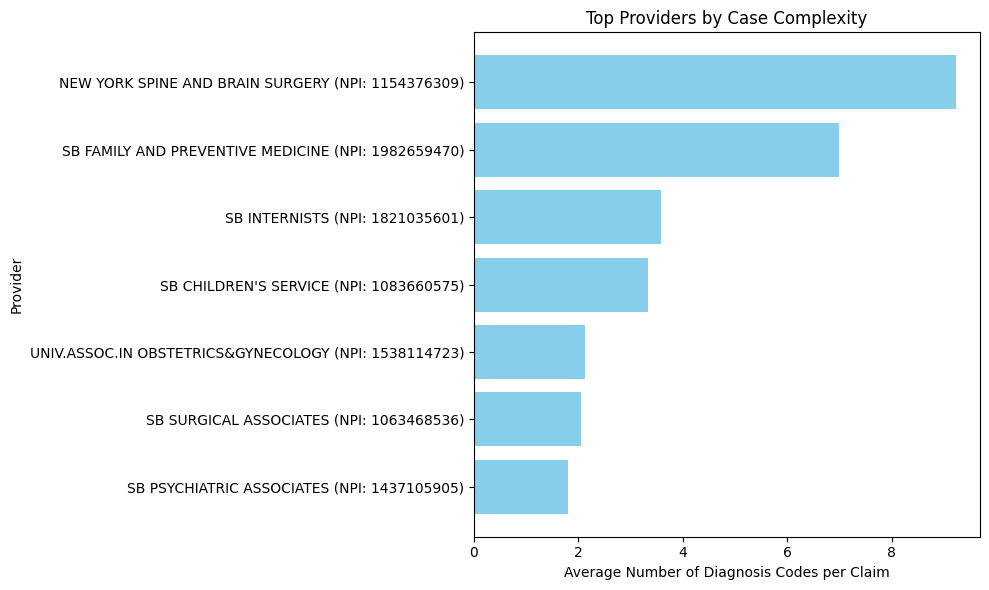

In [168]:
# Question 9: Your Own Analysis Develop and answer your own analytical question using the claims data. Your question should:

# Which providers bill for the most complex cases (highest number of diagnosis codes)?

# Require merging at least two of the three files
# Merge LINE and CODE datasets on claim ID
merge_lc = pd.merge(df_line, df_code, on='ProspectiveClaimId', how='inner')

# Count unique diagnosis codes per claim
diag_per_claim = merge_lc.groupby('ProspectiveClaimId')['CodeValue'].nunique().reset_index()

# Rename column
diag_per_claim.rename(columns={'CodeValue':'NumDiagnosisCodes'}, inplace=True)

# Merge with provider information from HEADER
header_cols = ['ProspectiveClaimId','BillingProviderNPI','BillingProvFirstName']
merge_provider = pd.merge(diag_per_claim, df_header[header_cols], on='ProspectiveClaimId', how='left')

# Use groupby or aggregation, Provide meaningful insight about the data
provider_complexity = merge_provider.groupby(['BillingProviderNPI','BillingProvFirstName']).agg(
    AverageDiagnosisCodes=('NumDiagnosisCodes','mean'),
    NumberOfClaims=('ProspectiveClaimId','count')
).reset_index()

top_providers = provider_complexity.sort_values(by='AverageDiagnosisCodes', ascending=False).head(10)
print(top_providers.to_string(index=False))

# Bar graph visualization
plt.figure(figsize=(10,6))
labels = top_providers['BillingProvFirstName'] + " (NPI: " + top_providers['BillingProviderNPI'].astype(str) + ")"
plt.barh(labels[::-1], top_providers['AverageDiagnosisCodes'][::-1], color='skyblue')
plt.xlabel('Average Number of Diagnosis Codes per Claim')
plt.ylabel('Provider')
plt.title('Top Providers by Case Complexity')
plt.tight_layout()
plt.show()
